In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter # 
import missingno as msno # Missing data - Data visualization
import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATASET

In [2]:
df = pd.read_csv(r"D:\johns\Documents\PERSONAL VITAL DOCUMENTS\Full Stack Data Science - 10Alytics\10ALYTICS July 2023 Cohort\Capstone Project\Customer-Churn.csv")


In [3]:
# Print the top rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Print the bottom row

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## DATA WRANGLING

In [5]:
# Examine the columns/features of the data

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Investigate the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Dimensionality of the data - The number of rows and column

df.shape

(7043, 21)

In [8]:
# Retrieve the index labels of the DataFrame df

df.index

RangeIndex(start=0, stop=7043, step=1)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


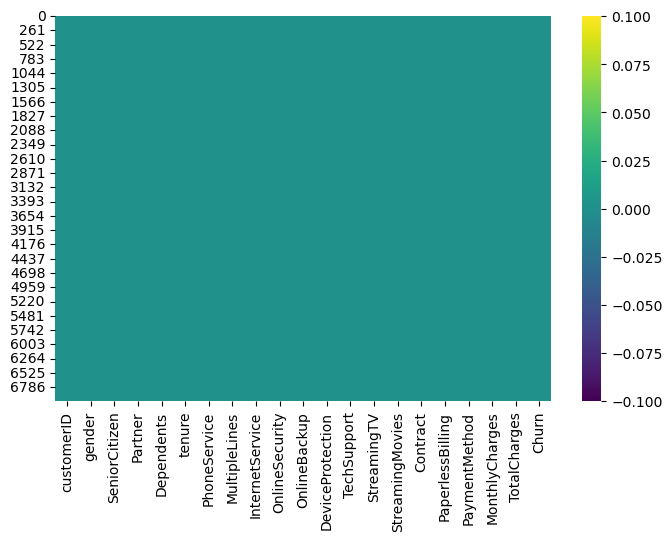

In [9]:
# checking for missing data points
print(df.isnull().sum())

# Visualizing through the missing data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.show();

In [10]:
# checking for data duplicate

df.duplicated().sum()

0

### Observation

- There are no missing values in the dataset.
- There are no duplicates in the dataset.

In [11]:
# Numerical statistical analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
# Numerical statistical analysis

df.describe().T  # Transpose the result of df.describe()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [13]:
# Categorical statistical analysis

df.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [14]:
# count the number of unique values to identify redundant features
{x: len(df[x].unique()) for x in  df.columns}

{'customerID': 7043,
 'gender': 2,
 'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531,
 'Churn': 2}

## Dropping Columns

- Remove irrelevant columns not needed for analysis
- We have identified data issues like redundant data like "customer id" that will be dropped.

In [15]:
# Drop the 'customerID' column
df.drop(columns=['customerID','TotalCharges', 'PaperlessBilling'], inplace=True)

# Check the first few rows of the DataFrame to confirm the column has been dropped
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


## Rename Columns

- Columns will be renamed as neccessary

In [16]:
# renaming columns

df.rename(columns={'SeniorCitizen':'Senior_Citizen', 'PhoneService':'Phone_Service','MultipleLines':'Multiple_Lines', 'InternetService':'Internet_Service', 'OnlineSecurity':'Online_Security', 'OnlineBackup':'Online_Backup',
                   'DeviceProtection':'Device_Protection','TechSupport':'Tech_Support','StreamingTV':'Streaming_TV', 'StreamingMovies':'Streaming_Movies','PaymentMethod':'Payment_Method', 'MonthlyCharges':'Monthly_Charges'}, inplace=True)

In [17]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


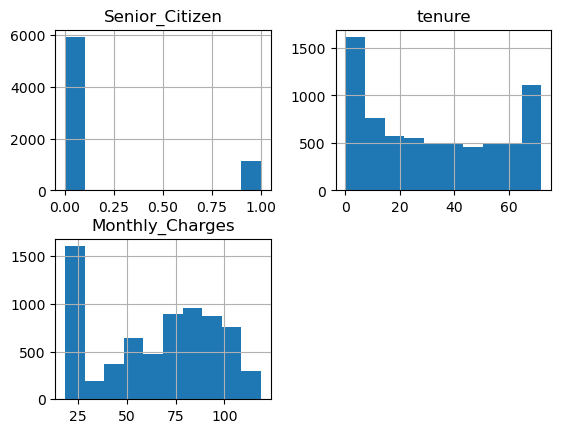

In [18]:
df.hist()
plt.show()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Senior_Citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
Monthly_Charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [20]:
df.describe(exclude = ['int64','float64']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
Phone_Service,7043,2,Yes,6361
Multiple_Lines,7043,3,No,3390
Internet_Service,7043,3,Fiber optic,3096
Online_Security,7043,3,No,3498
Online_Backup,7043,3,No,3088
Device_Protection,7043,3,No,3095
Tech_Support,7043,3,No,3473


# **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

**Categorical Data**

In [21]:
df.columns

Index(['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method',
       'Monthly_Charges', 'Churn'],
      dtype='object')

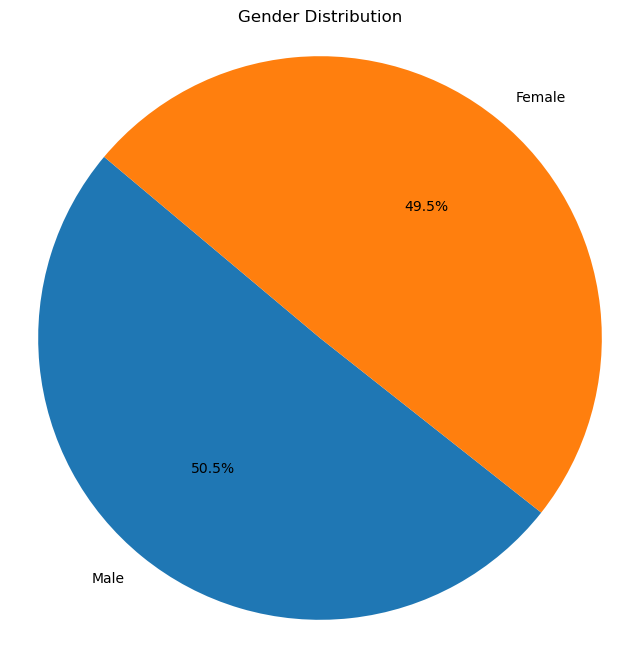

In [22]:
# Customer gender distributions
gender_counts = df["gender"].value_counts(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

In [23]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

### DEDUCTIONS: 
 
It was observed that the male customers are 3555 which is slightly more than the female customers of 3488. 
This information does help in analyzing gender based trends in customer churn.

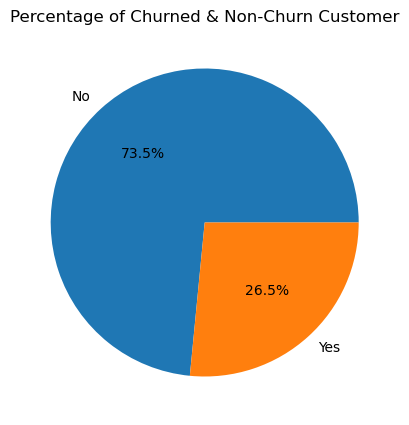

In [24]:
# Assuming 'df' is your DataFrame and 'Churn' is a column in it
# % of churned and non churn customers 

count = Counter(df["Churn"])
labels = count.keys()
values = count.values()

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title("Percentage of Churned & Non-Churn Customer")
plt.show()

In [25]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### DEDUCTIONS: 

It was deduced that the customers that have churned are 1869 while 5174 customers are still with the Connecttel.
it's the main variable to predict in the Telecom customer churn analysis.

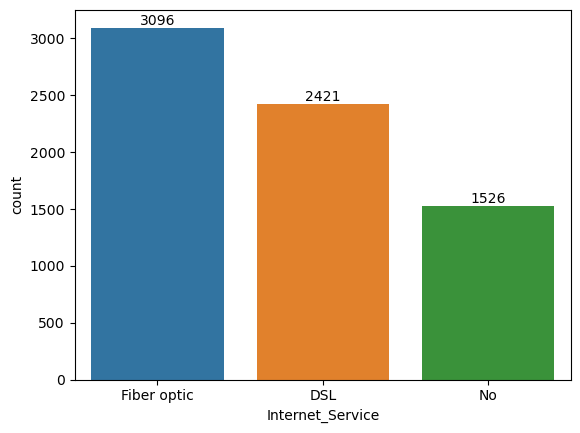

In [26]:
# Distributions of customers with or without Internet Service

ax = sns.countplot(x=df["Internet_Service"], order=df["Internet_Service"].value_counts(ascending=False).index)
values = df["Internet_Service"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### DEDUCTIONS:

Based on the internet service distributions, it was observed that the customers that use fiber optic were more with count 
of 3096, while DSL was 2421 and the lowest count was the customer with no internet service which were 1526 customers.

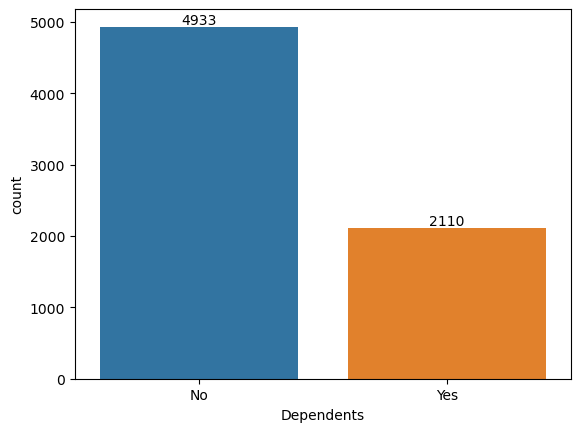

In [27]:
# Distributions of customers with or without Dependent

ax = sns.countplot(x=df["Dependents"], order=df["Dependents"].value_counts(ascending=False).index)
values = df["Dependents"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

**DEDUCTIONS:**

The customers that have dependants are 4933 while 2110 customers did not have dependants.

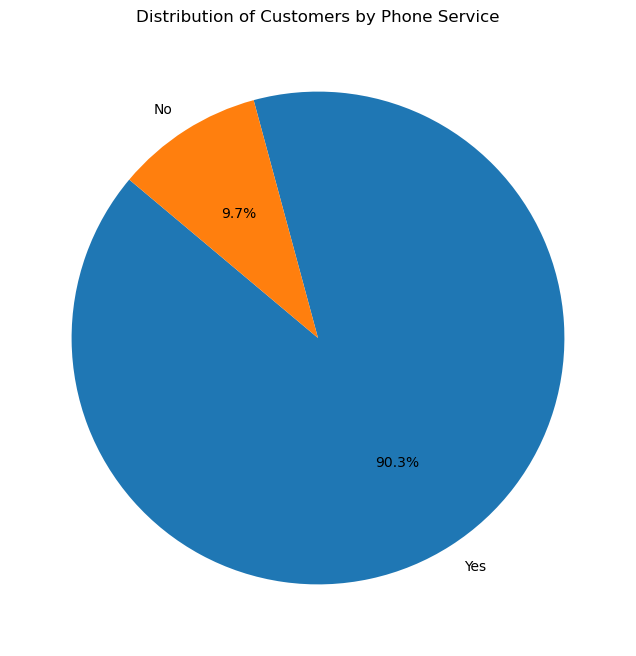

In [28]:
# Distributions of customers by choice regarding phone service


# Count values for each category
counts = df['Phone_Service'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Phone Service')
plt.show();

### DEDUCTIONS:

Based on the phone service distributions, it was observed that the most customers (6361 and 90.3%) have or rely on phone service than the rest (682 and 9.7%). And clearly will be a huge factor in determining customer churn.

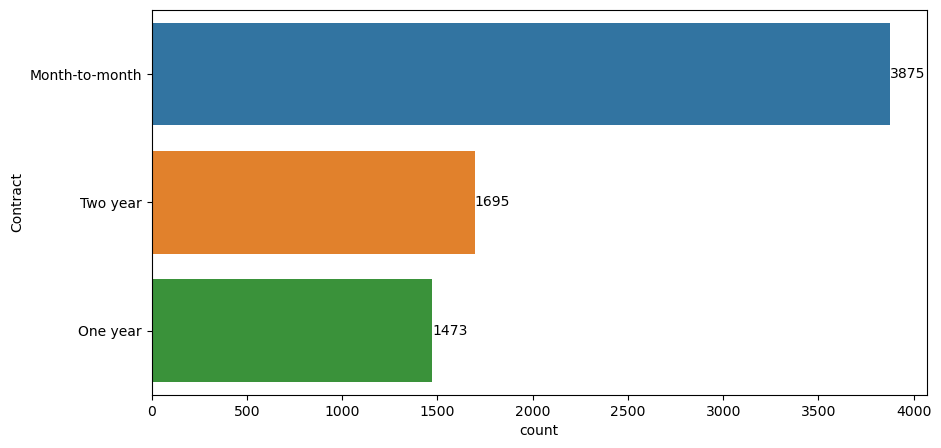

In [29]:
# Relationship of customers based on contract type

plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df["Contract"],order=df["Contract"].value_counts(ascending=False).index) 
values = df["Contract"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### DEDUCTIONS:

- Month to month customers were more with the value of 3875, the two year customers were just 1695
- while one year customers were the lowest with 1473 customers.

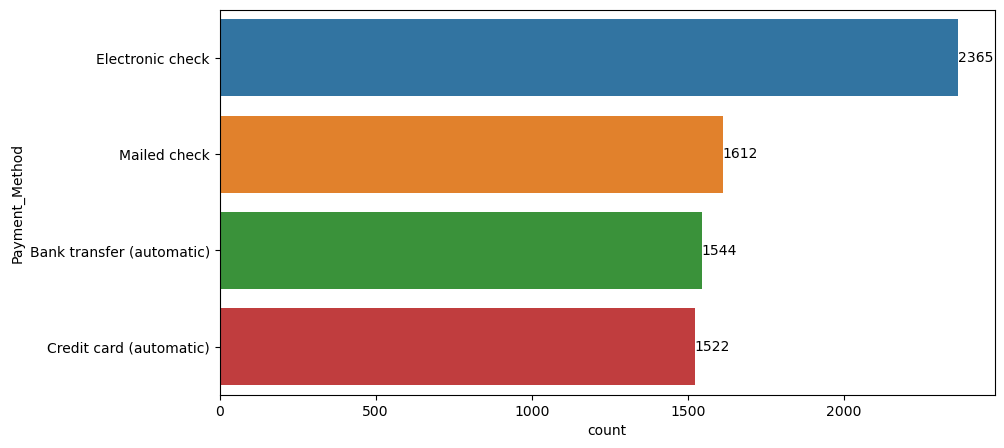

In [30]:
# How many customers by Payment method

plt.figure(figsize=(10, 5))
ax = sns.countplot(y=df["Payment_Method"],order=df["Payment_Method"].value_counts(ascending=False).index) 
values = df["Payment_Method"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### DEDUCTIONS:

- This attribute helps in evaluating the impact of payment methods on churn. 
- The EDA pointed out that the Electronic check customers were more than every other payment methods with the value of 2365 customers, followed by mailed check customers of 1612. 
- Bank transfer customers were 1544 and credit card customers was the lowest with 1522 customers.

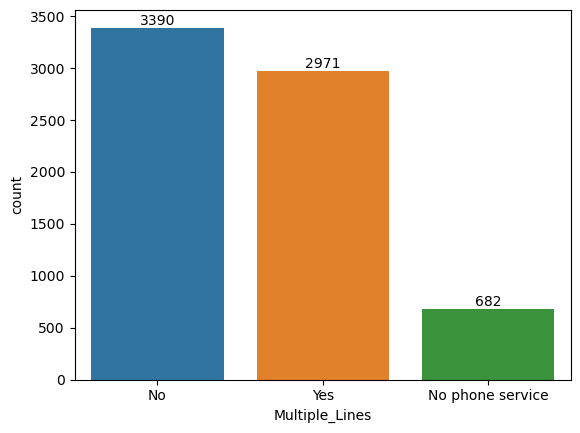

In [31]:
#How many customers with Multiple Lines

ax = sns.countplot(x=df["Multiple_Lines"], order=df["Multiple_Lines"].value_counts(ascending=False).index)
values = df["Multiple_Lines"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### DEDUCTIONS:
    
- Customers with No Multiple lines were 3390, followed by Multiple lines customers of 2971 counts but the customers with No phone services were just 682 in number.

# **NUMERICAL DATA VISUALIZATION

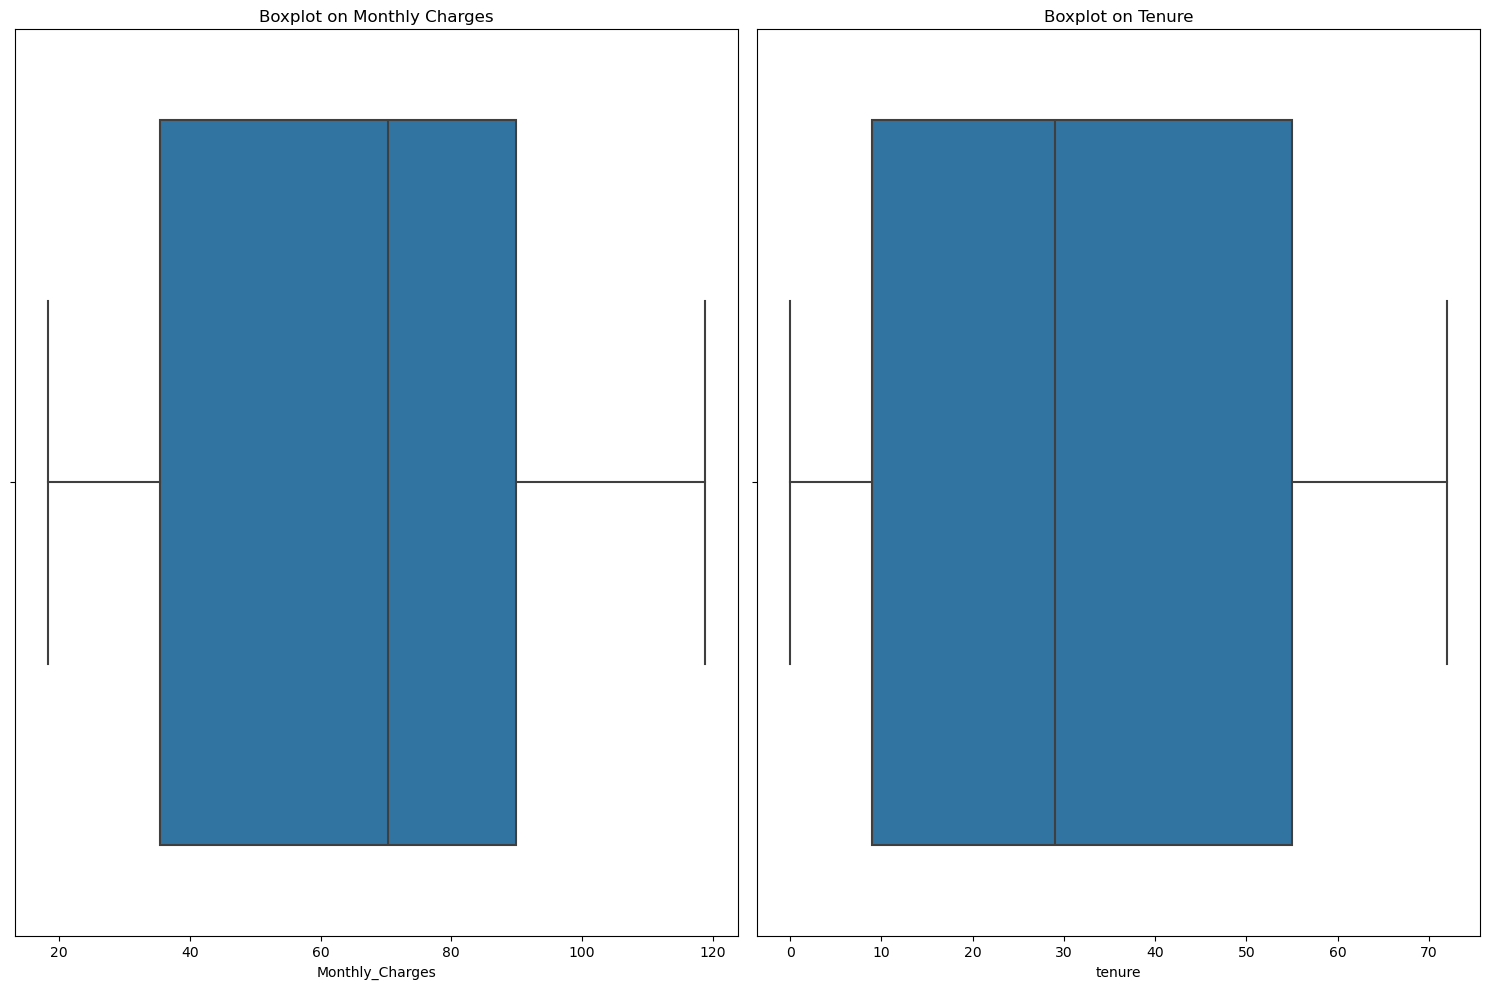

In [32]:
# Monthly Charges and Tenure

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot on Monthly Charges
sns.boxplot(x="Monthly_Charges", data=df, ax=axs[0])
axs[0].set_title("Boxplot on Monthly Charges")

# Boxplot on Tenure
sns.boxplot(x="tenure", data=df, ax=axs[1])
axs[1].set_title("Boxplot on Tenure")

plt.tight_layout()
plt.show();

### DEDUCTIONS:

There is no significant outliers in the numerical column analysis.

# BIVARIATE ANALYSIS

Bivariate analysis involves analyzing the relationship between two variables with focus on Customer churn

- Bivariate Categorical variables

- Bivariate Numerical variable

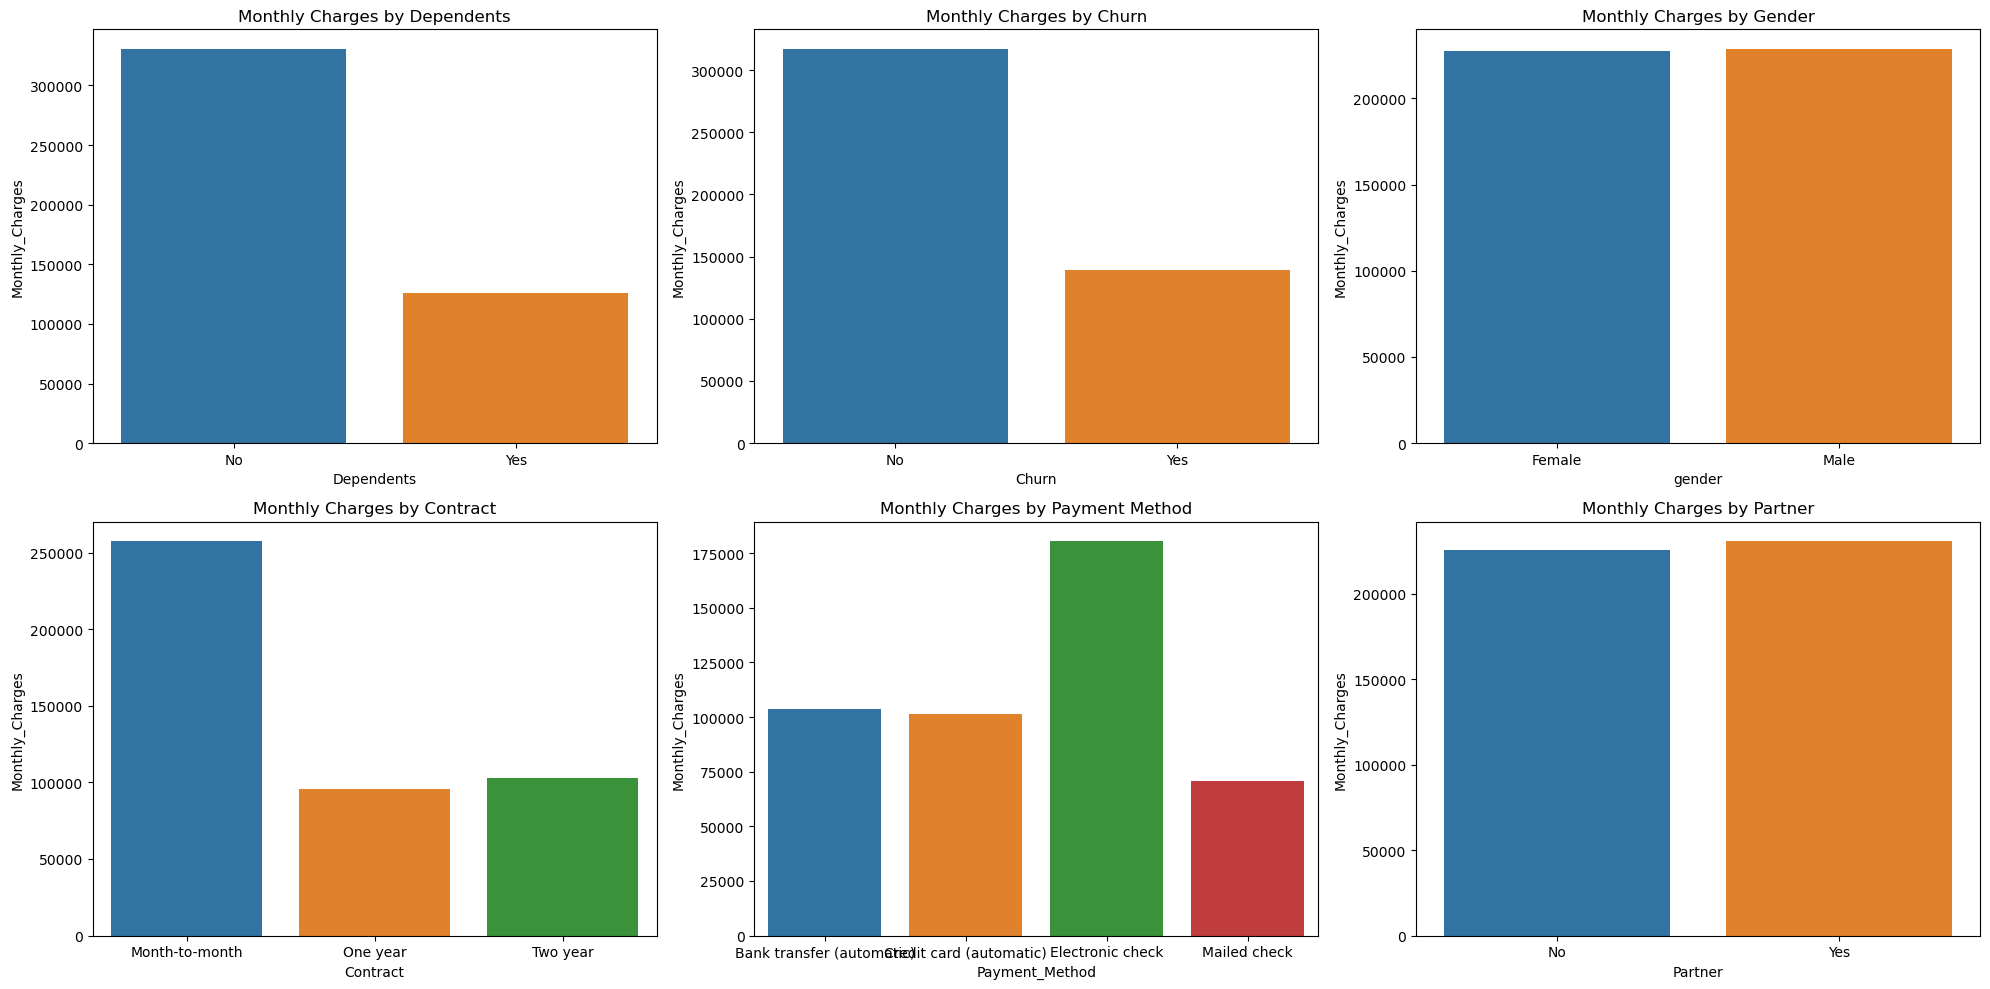

In [33]:
# Bivariate Categorical vs Numerical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

dep_mt = df.groupby("Dependents")["Monthly_Charges"].sum().reset_index()
sns.barplot(x='Dependents', data=dep_mt, y='Monthly_Charges', ax=axs[0,0])
axs[0,0].set_title("Monthly Charges by Dependents")

ch_mt = df.groupby("Churn")["Monthly_Charges"].sum().reset_index()
sns.barplot(x='Churn', data=ch_mt, y='Monthly_Charges', ax=axs[0,1])
axs[0,1].set_title("Monthly Charges by Churn")

gen_mt = df.groupby("gender")["Monthly_Charges"].sum().reset_index()
sns.barplot(x='gender', data=gen_mt, y='Monthly_Charges', ax=axs[0,2])
axs[0,2].set_title("Monthly Charges by Gender")

Cont_mt = df.groupby("Contract")["Monthly_Charges"].sum().reset_index()
sns.barplot(x='Contract', data=Cont_mt, y='Monthly_Charges', ax=axs[1,0])
axs[1,0].set_title("Monthly Charges by Contract")

paymt_mt = df.groupby("Payment_Method")["Monthly_Charges"].sum().reset_index()
sns.barplot(x='Payment_Method', data=paymt_mt, y='Monthly_Charges', ax=axs[1,1])
axs[1,1].set_title("Monthly Charges by Payment Method")

par_mt = df.groupby("Partner")["Monthly_Charges"].sum().reset_index()
sns.barplot(x='Partner', data=par_mt, y='Monthly_Charges', ax=axs[1,2])
axs[1,2].set_title("Monthly Charges by Partner")

plt.tight_layout()
plt.show();

### DEDUCTIONS:

- Customers with No dependents paid more monthly charges than the customers with dependents.

- The Monthly charges paid by no churned customers were more than the churned customers.

- The analysis showed that the Monthly charges generated from Old-customers were higher than the new customers and very low monthly charges were generated from medium customers.

- In terms of Contract, Month to month customers tends to contributed more monthly charges, next to this was customers with Two years contract and last was One year contract customers.
    
- Most monthlycharges were generated from Electronic check, next to that is Bank transfer and credit card, while mailed check generated the least.

In [ ]:
df.columns

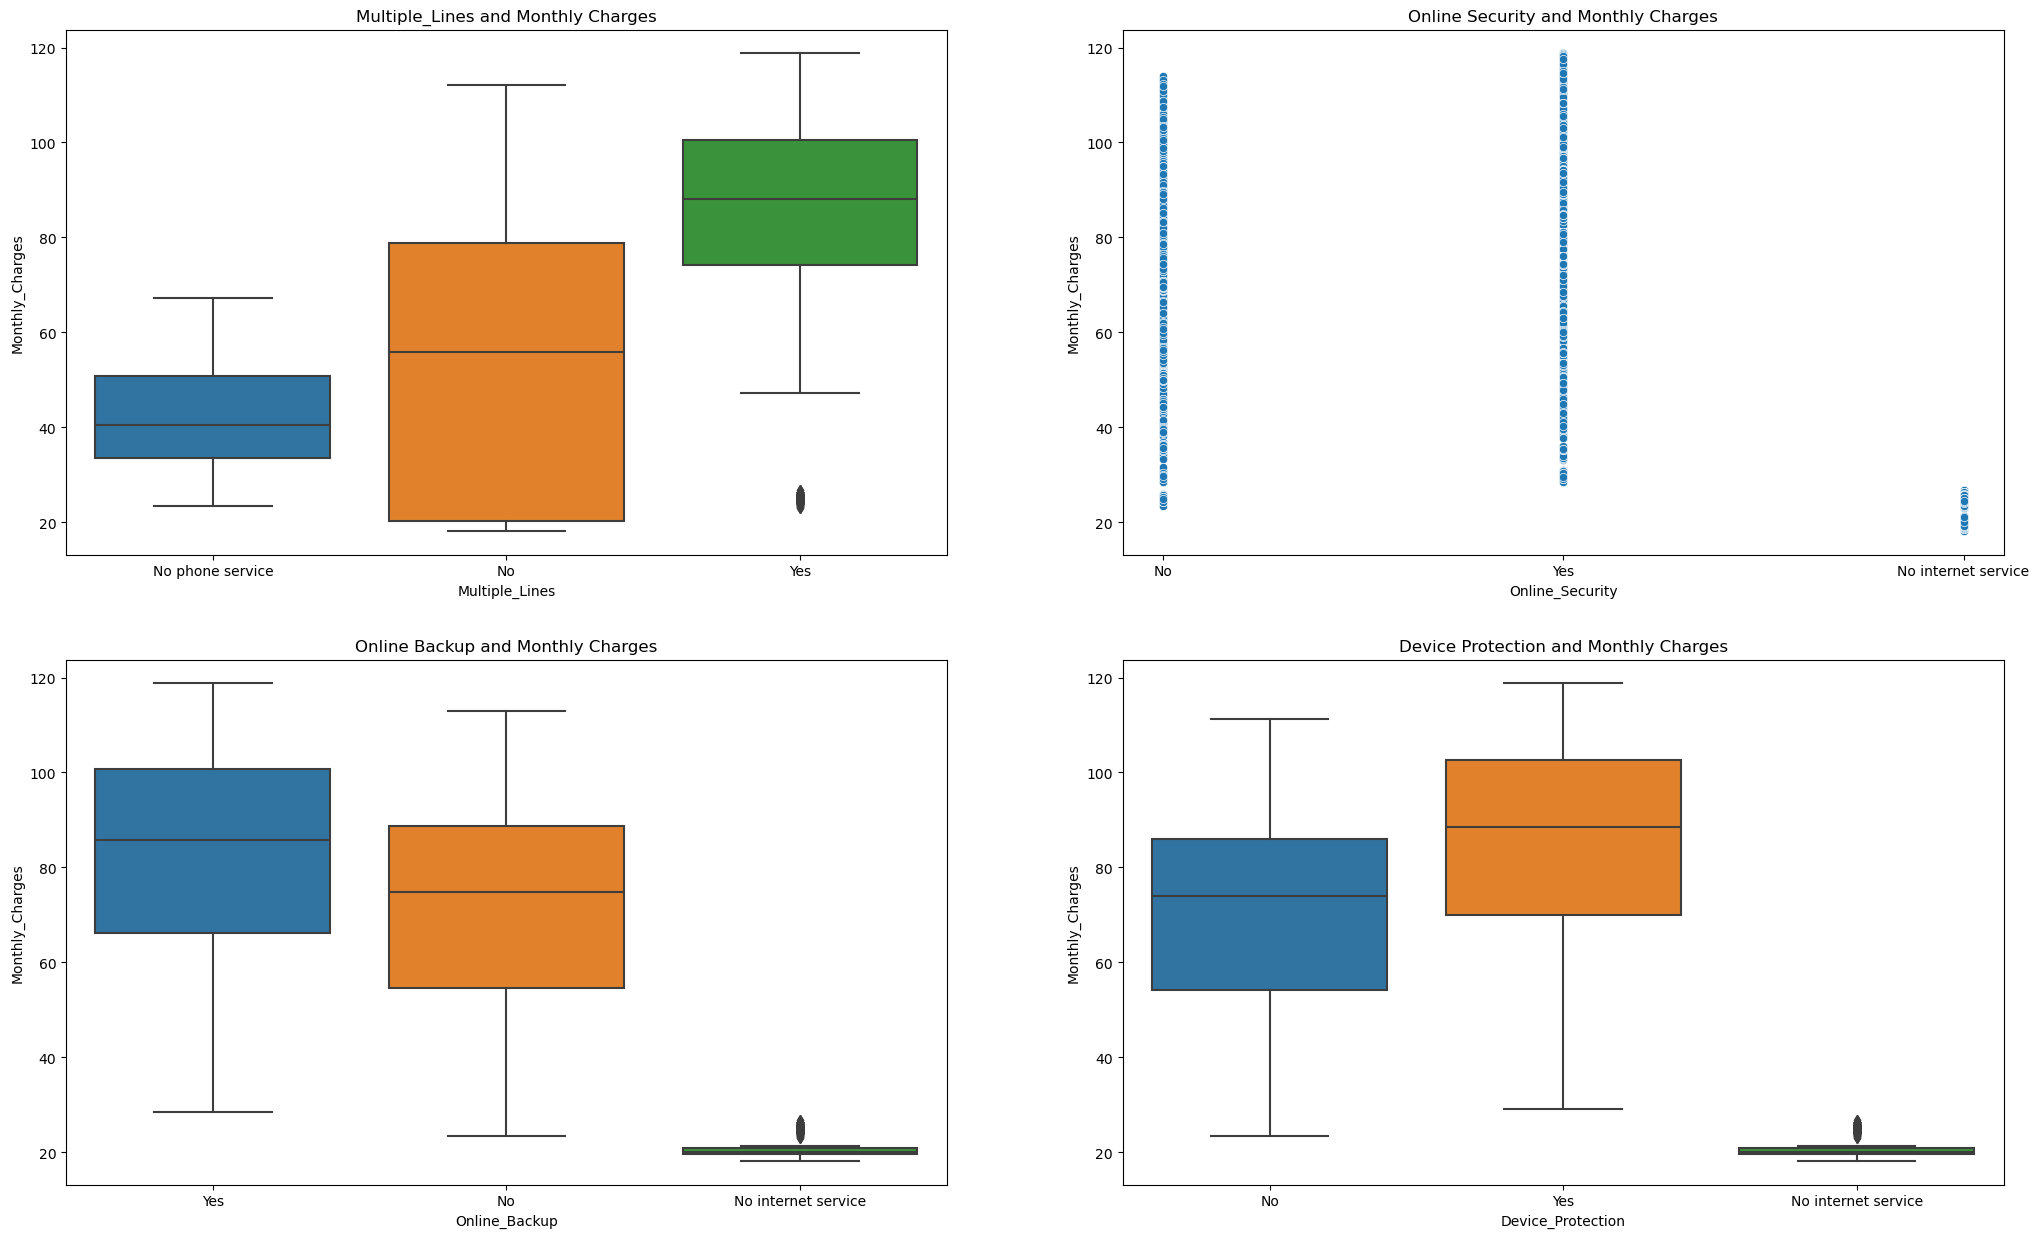

In [34]:
### BIVARIATE NUMERICAL COLUMNS

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
sns.boxplot(x="Multiple_Lines", y="Monthly_Charges", data=df, ax=axs[0,0])
axs[0,0].set_title("Multiple_Lines and Monthly Charges")
sns.scatterplot(x='Online_Security', y="Monthly_Charges", data=df, ax=axs[0,1])
axs[0,1].set_title("Online Security and Monthly Charges")
sns.boxplot(x="Online_Backup", y="Monthly_Charges", data=df, ax=axs[1,0])
axs[1,0].set_title("Online Backup and Monthly Charges")
sns.boxplot(x="Device_Protection", y="Monthly_Charges", data=df, ax=axs[1,1])
axs[1,1].set_title("Device Protection and Monthly Charges");

### DEDUCTIONS:
    
- There are outliers for customers with multiple lines compared with the their monthly charges.
- There is no outliers between the online security with monthly charges and for Online backup with monthly charges.

# MULTIVARIATE ANALYSIS

This analysis involves analyzing the relationship between three or more variables

In [35]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


In [ ]:
df.columns

In [36]:
#Churn against Monthly Charges, tenure and Senior citizens
procat = df.groupby("Churn")[["Monthly_Charges", "tenure", "Senior_Citizen"]].sum().reset_index()
procat

,Churn,Monthly_Charges,tenure,Senior_Citizen
0,No,316985.75,194387,666
1,Yes,139130.85,33603,476


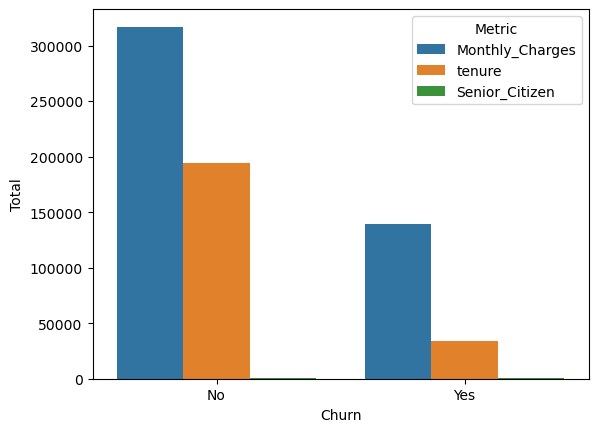

In [37]:
procat = df.groupby("Churn")[["Monthly_Charges", "tenure", "Senior_Citizen"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Churn", var_name="Metric", value_name="Total")
sns.barplot(data=procat, x='Churn', y="Total", hue="Metric");

### DEDUCTIONS:

- Monthly charges generated from the no churn customers is quite higher than the monthly charges generated from the churned customer.
- next to it, is the tenure while the senior citizens had a very low count.

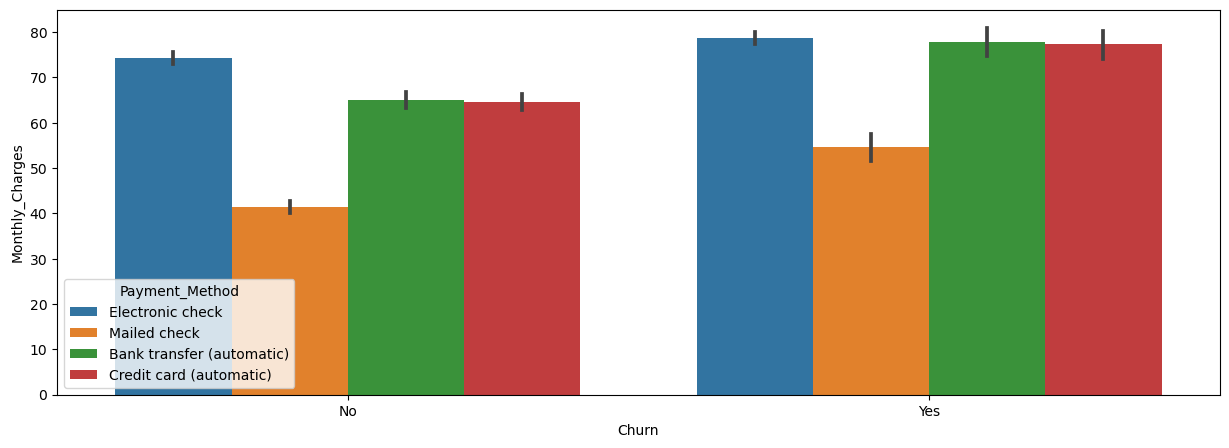

In [38]:
#Churn Payment method and Monthly charges
plt.figure(figsize=(15,5))
sns.barplot(x="Churn", y='Monthly_Charges', data=df, hue="Payment_Method");

### DEDUCTIONS:

Electronic check account for the large chunk of the monthly charges, 
bank transfer was slighly higher than the credit card while mailed check account for the lowest monthly charges.

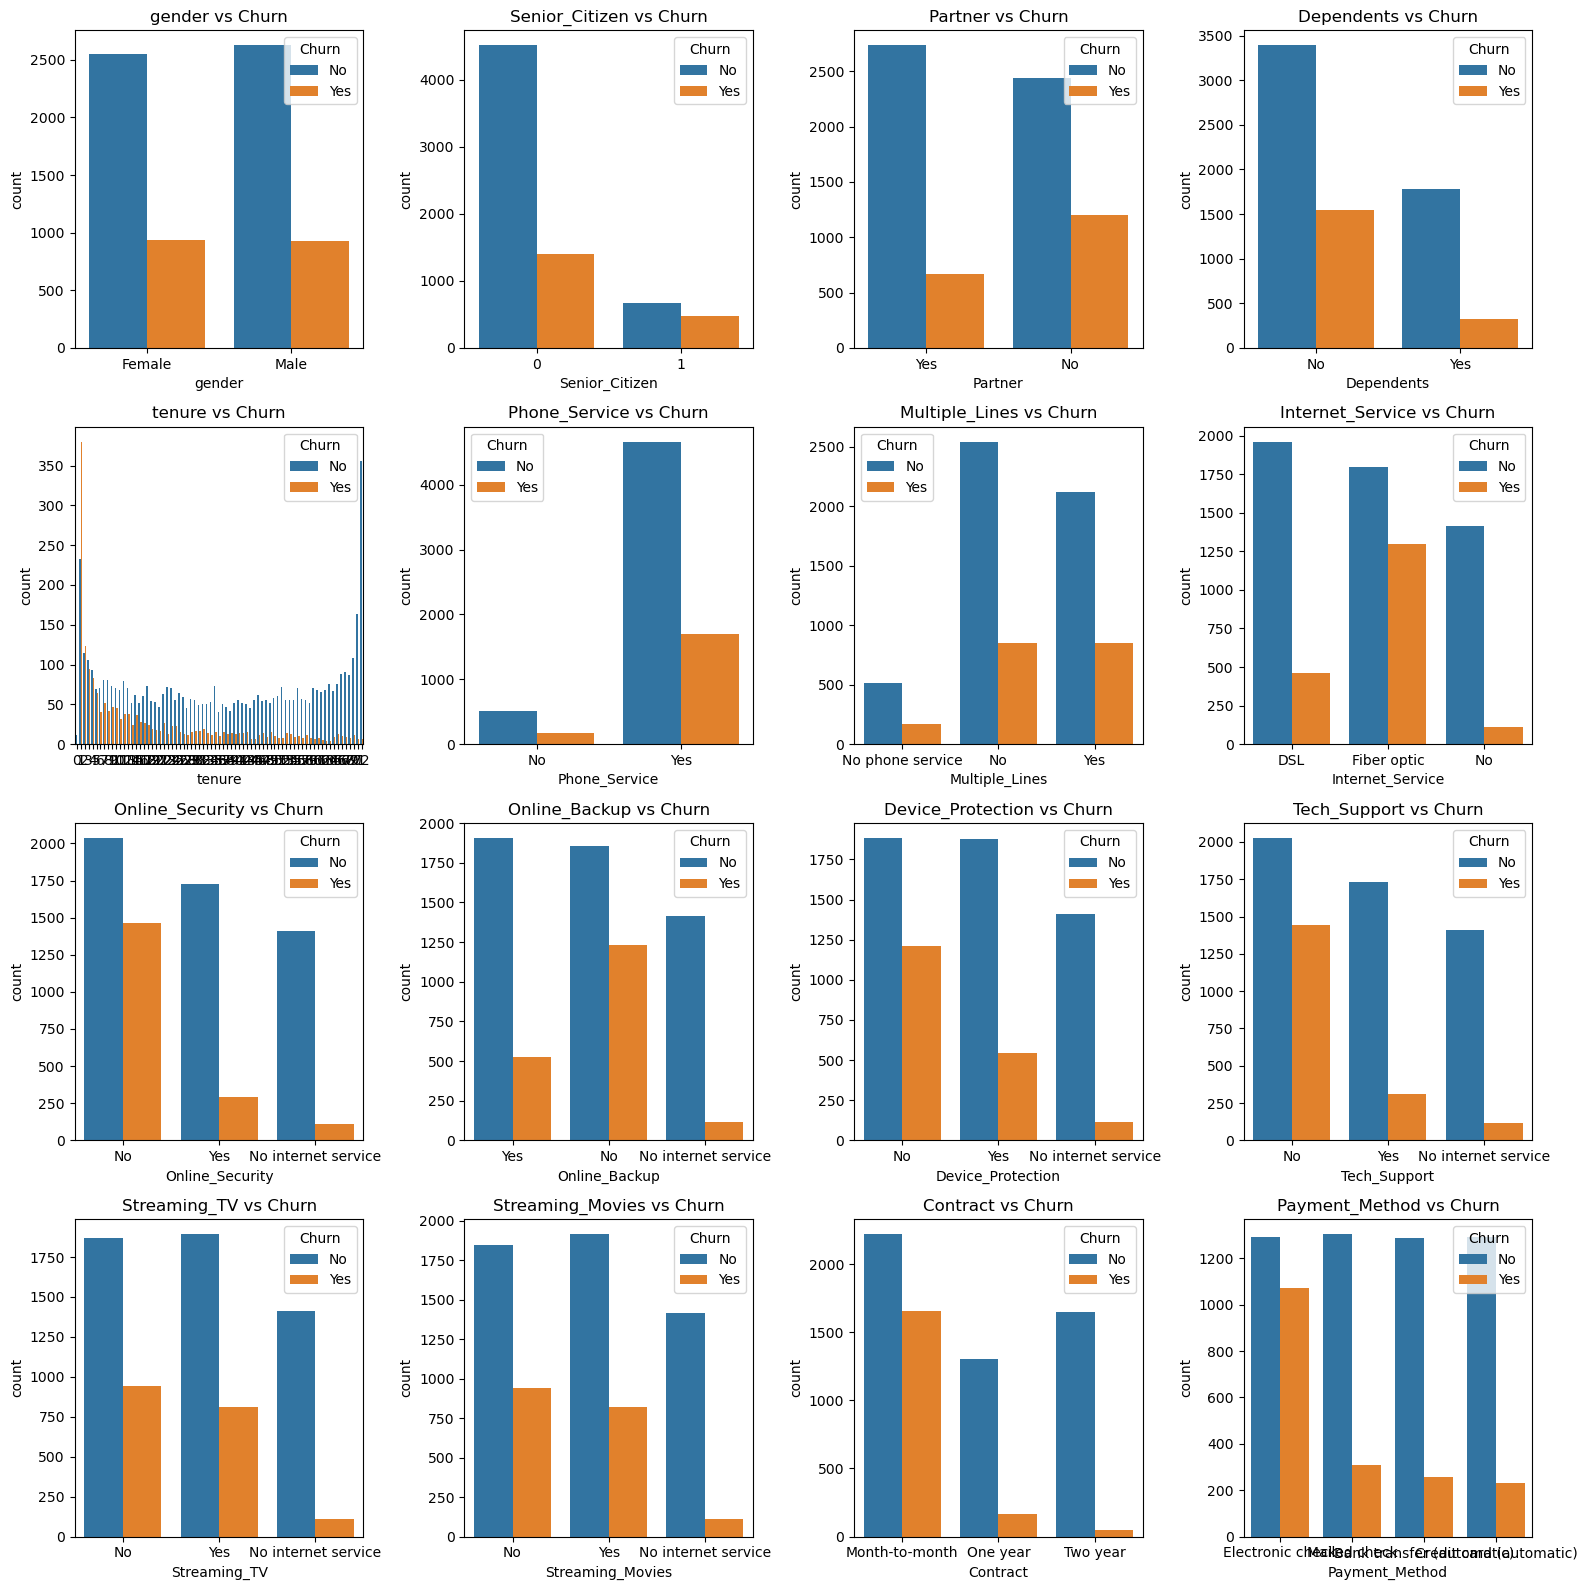

In [39]:
# Define a list of key features to visualize, including categorical and numerical features
key_features = ['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
                'Phone_Service', 'Multiple_Lines', 'Internet_Service','Online_Security', 'Online_Backup', 
                'Device_Protection', 'Tech_Support','Streaming_TV', 'Streaming_Movies', 'Contract', 
                'Payment_Method','Monthly_Charges', 'Churn']

# Create a 4x4 grid for subplots with a size of 16x16 inches
plt.figure(figsize=(16, 16))

# Iterate over the first 16 features in the key_features list
for i, feature in enumerate(key_features[:16], 1):
    # Create a subplot at position i in the grid
    plt.subplot(4, 4, i)
    
    # Plot a countplot for the current feature against the 'Churn' column
    sns.countplot(x=feature, hue='Churn', data=df)
    
    # Set title for the subplot
    plt.title(f'{feature} vs Churn')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Show the plot
plt.show();

### DEDUCTIONS

From the viz above, the following can be deduced;

- Slightly more male clients stay loyal to the service than female clients.
- A lot more customers who are senior citizens and have phone service, stay on than those of them cancelling.
- Customers with partners and dependents likely stay suscribed, than those without partners and dependents. 

# FEATURE ENGINEERING/DATA PROCESSING

- We will then encode the categorical features in the data.

- Scale the data set, in prepping for modelling.

- Plot a feature importances visualization, to understand features that may be important predictor features from the dataset.

In [40]:
# Import neccessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre- Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [41]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


In [42]:
df.columns

Index(['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method',
       'Monthly_Charges', 'Churn'],
      dtype='object')

In [43]:
# Encode the target variable

# DataFrame 'df' with a column 'Churn'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [44]:
# Encode the gender variable

# DataFrame 'df' with a column 'gender'

# You want to replace 'Yes' with 1 and 'No' with 0
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [45]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,0
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,0
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,1
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,0
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,1


In [46]:
# Encode the Partner variable

# DataFrame 'df' with a column 'Partner'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})

In [47]:
# Encode the Dependents variable

# DataFrame 'df' with a column 'Dependents'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})

In [48]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,0
1,0,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,0
2,0,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,1
3,0,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,1


In [49]:
# Encode the Phone service variable

# DataFrame 'df' with a column 'Phone service'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Phone_Service'] = df['Phone_Service'].replace({'Yes': 1, 'No': 0})

In [50]:
# Encode the MultipleLines variable

# DataFrame 'df' with a column 'Multiple Lines'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Multiple_Lines'] = df['Multiple_Lines'].replace({'No phone service': 2, 'No': 1, 'Yes': 0})

In [51]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,0,2,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,0
1,0,0,0,0,34,1,1,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,0
2,0,0,0,0,2,1,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,1
3,0,0,0,0,45,0,2,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,1


In [52]:
# Encode the Internet Service variable

# DataFrame 'df' with a column 'Internet Service'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Internet_Service'] = df['Internet_Service'].replace({'DSL': 2, 'Fiber optic': 1, 'No': 0})

In [53]:
# Encode the Online Security variable

# DataFrame 'df' with a column 'OnlineSecurity'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Online_Security'] = df['Online_Security'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [54]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,0,2,2,0,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,0
1,0,0,0,0,34,1,1,2,1,No,Yes,No,No,No,One year,Mailed check,56.95,0
2,0,0,0,0,2,1,1,2,1,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,1
3,0,0,0,0,45,0,2,2,1,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,1,1,0,No,No,No,No,No,Month-to-month,Electronic check,70.70,1


In [55]:
# Encode the Online Backup variable

# DataFrame 'df' with a column 'Online Backup'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Online_Backup'] = df['Online_Backup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [56]:
# Encode the Device Protection variable

# DataFrame 'df' with a column 'Device Protection'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Device_Protection'] = df['Device_Protection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [57]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,No,No,No,Month-to-month,Electronic check,29.85,0
1,0,0,0,0,34,1,1,2,1,0,1,No,No,No,One year,Mailed check,56.95,0
2,0,0,0,0,2,1,1,2,1,1,0,No,No,No,Month-to-month,Mailed check,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,Yes,No,No,One year,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,1,1,0,0,0,No,No,No,Month-to-month,Electronic check,70.70,1


In [58]:
# Encode the TechSupport variable

# DataFrame 'df' with a column 'OnlineBackup'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Tech_Support'] = df['Tech_Support'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [59]:
# Encode the Streaming TV variable

# DataFrame 'df' with a column 'Streaming TV'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Streaming_TV'] = df['Streaming_TV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [60]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,No,Month-to-month,Electronic check,29.85,0
1,0,0,0,0,34,1,1,2,1,0,1,0,0,No,One year,Mailed check,56.95,0
2,0,0,0,0,2,1,1,2,1,1,0,0,0,No,Month-to-month,Mailed check,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,No,One year,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,1,1,0,0,0,0,0,No,Month-to-month,Electronic check,70.70,1


In [61]:
# Encode the Streaming Movies variable

# DataFrame 'df' with a column 'Streaming Movies'
# You want to replace 'Yes' with 1 and 'No' with 0
df['Streaming_Movies'] = df['Streaming_Movies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [62]:
# Encode the Contract variable

# DataFrame 'df' with a column 'Contract'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year':2})

In [63]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,Electronic check,29.85,0
1,0,0,0,0,34,1,1,2,1,0,1,0,0,0,1,Mailed check,56.95,0
2,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,Mailed check,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,Electronic check,70.70,1


In [64]:
# Encode the PaymentMethod variable

# DataFrame 'df' with a column 'PaymentMethod'

# You want to replace 'Yes' with 1 and 'No' with 0
df['Payment_Method'] = df['Payment_Method'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [65]:
df.head(15)

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,0,29.85,0
1,0,0,0,0,34,1,1,2,1,0,1,0,0,0,1,1,56.95,0
2,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,1,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,2,42.30,0
4,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,70.70,1
5,1,0,0,0,8,1,0,1,0,0,1,0,1,1,0,0,99.65,1
6,0,0,0,1,22,1,0,1,0,1,0,0,1,0,0,3,89.10,0
7,1,0,0,0,10,0,2,2,1,0,0,0,0,0,0,1,29.75,0
8,1,0,1,0,28,1,0,1,0,0,1,1,1,1,0,0,104.80,1
9,0,0,0,1,62,1,1,2,1,1,0,0,0,0,1,2,56.15,0


In [66]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Specify the columns to scale
columns_to_scale = ['Monthly_Charges', 'tenure']

# Fit the scaler to the specified columns
scaler.fit(df[columns_to_scale])

# Transform the specified columns using the scaler
df_scaled = scaler.transform(df[columns_to_scale])

# Replace the original columns with the scaled columns in the DataFrame
df[columns_to_scale] = df_scaled

In [67]:
df.tail(15)

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
7028,1,0,1,0,0.944444,1,1,2,0,1,0,1,1,0,2,2,0.456219,0
7029,1,1,0,0,0.083333,0,2,2,0,0,0,0,1,1,0,0,0.260199,0
7030,1,0,0,0,0.027778,1,1,0,2,2,2,2,2,2,0,1,0.017910,0
7031,0,1,1,0,0.763889,1,0,2,1,1,0,0,0,0,1,3,0.415423,0
7032,0,1,0,0,0.013889,1,0,1,0,0,0,0,0,0,0,0,0.572139,1
7033,0,0,0,0,0.527778,1,1,1,0,0,0,0,0,0,0,3,0.509950,0
7034,1,0,0,0,0.930556,1,0,1,1,1,1,0,1,0,0,3,0.842786,1
7035,0,0,0,0,0.263889,1,1,1,0,0,0,0,1,0,0,2,0.601493,0
7036,1,0,0,0,0.166667,0,2,2,0,1,1,1,1,1,1,0,0.421891,0
7037,1,0,0,0,1.000000,1,1,0,2,2,2,2,2,2,2,2,0.028856,0


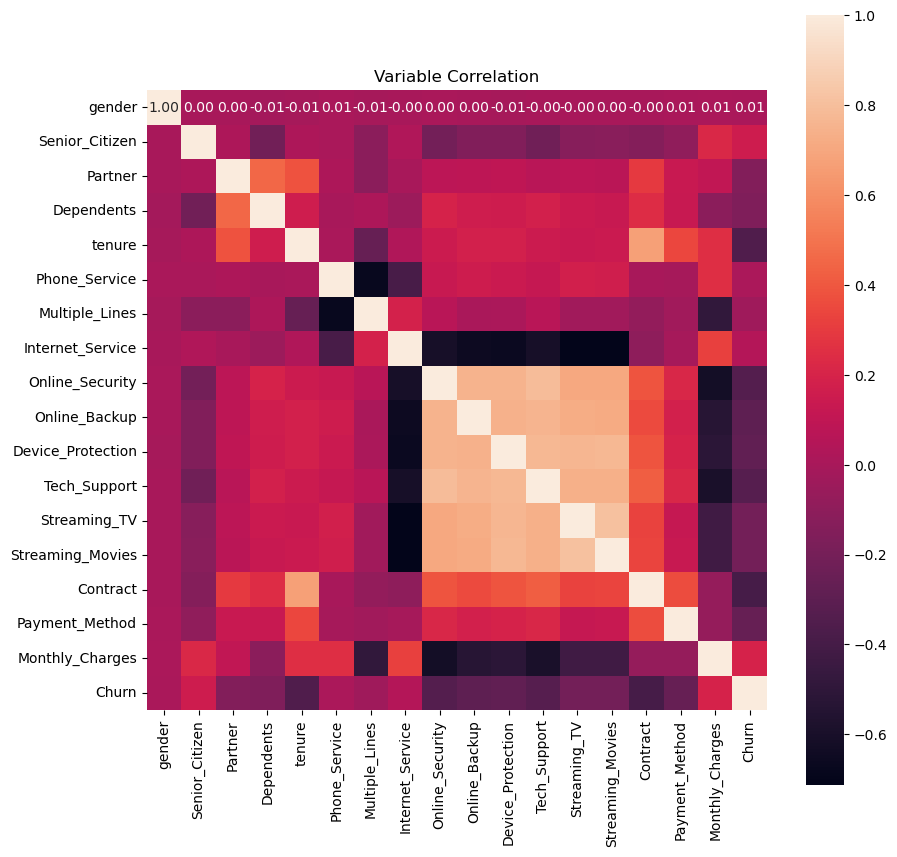

In [68]:
# Recalculate the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, fmt=".2f", square=True)
plt.title('Variable Correlation')
plt.show();

In [69]:
df.columns

Index(['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method',
       'Monthly_Charges', 'Churn'],
      dtype='object')

In [70]:
# create a copy of the data, (exclude Target/Label, and other categorical columns that were earlier created)

df1= df[['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method',
       'Monthly_Charges',]]

label = df[['Churn']]

In [71]:
df1.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges
0,1,0,1,0,0.013889,0,2,2,0,1,0,0,0,0,0,0,0.115423
1,0,0,0,0,0.472222,1,1,2,1,0,1,0,0,0,1,1,0.385075
2,0,0,0,0,0.027778,1,1,2,1,1,0,0,0,0,0,1,0.354229
3,0,0,0,0,0.625000,0,2,2,1,0,1,1,0,0,1,2,0.239303
4,1,0,0,0,0.027778,1,1,1,0,0,0,0,0,0,0,0,0.521891


In [72]:
label.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [73]:
df1.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges
0,1,0,1,0,0.013889,0,2,2,0,1,0,0,0,0,0,0,0.115423
1,0,0,0,0,0.472222,1,1,2,1,0,1,0,0,0,1,1,0.385075
2,0,0,0,0,0.027778,1,1,2,1,1,0,0,0,0,0,1,0.354229
3,0,0,0,0,0.625000,0,2,2,1,0,1,1,0,0,1,2,0.239303
4,1,0,0,0,0.027778,1,1,1,0,0,0,0,0,0,0,0,0.521891


In [74]:
df1.dtypes

gender                 int64
Senior_Citizen         int64
Partner                int64
Dependents             int64
tenure               float64
Phone_Service          int64
Multiple_Lines         int64
Internet_Service       int64
Online_Security        int64
Online_Backup          int64
Device_Protection      int64
Tech_Support           int64
Streaming_TV           int64
Streaming_Movies       int64
Contract               int64
Payment_Method         int64
Monthly_Charges      float64
dtype: object

In [75]:
df.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn
0,1,0,1,0,0.013889,0,2,2,0,1,0,0,0,0,0,0,0.115423,0
1,0,0,0,0,0.472222,1,1,2,1,0,1,0,0,0,1,1,0.385075,0
2,0,0,0,0,0.027778,1,1,2,1,1,0,0,0,0,0,1,0.354229,1
3,0,0,0,0,0.625000,0,2,2,1,0,1,1,0,0,1,2,0.239303,0
4,1,0,0,0,0.027778,1,1,1,0,0,0,0,0,0,0,0,0.521891,1


In [76]:
df.dtypes

gender                 int64
Senior_Citizen         int64
Partner                int64
Dependents             int64
tenure               float64
Phone_Service          int64
Multiple_Lines         int64
Internet_Service       int64
Online_Security        int64
Online_Backup          int64
Device_Protection      int64
Tech_Support           int64
Streaming_TV           int64
Streaming_Movies       int64
Contract               int64
Payment_Method         int64
Monthly_Charges      float64
Churn                  int64
dtype: object

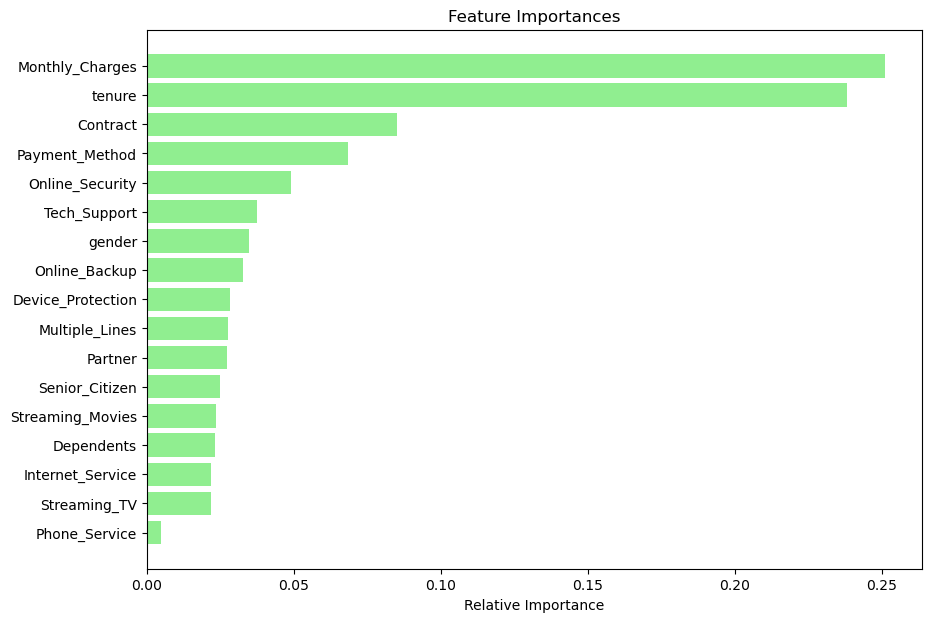

In [99]:
#identifying the key features from the dataset
#plotting a feature importance chart

model = RandomForestClassifier()
#fit the model
model.fit(df1, label)
feature_names = list(df.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = 'lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# MACHINE LEARNING

**Model Selection, Training and Validation**

In [77]:
from sklearn.metrics import accuracy_score as ac

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42);

In [78]:
df1.shape

(7043, 17)

In [79]:
label.shape

(7043, 1)

In [80]:
X_train.head(3)

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges
2142,1,0,0,1,0.291667,1,1,2,1,0,1,0,0,1,1,1,0.463682
1623,1,0,0,0,0.750000,1,0,1,0,1,0,0,1,1,2,2,0.785572
6074,0,0,1,0,0.013889,0,2,2,0,0,0,0,0,0,0,0,0.051741


In [81]:
y_train.head()

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0


In [82]:
X_test

,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges
185,1,0,1,0,0.013889,0,2,2,0,0,0,0,0,0,0,0,0.065174
2715,0,0,0,0,0.569444,1,0,0,2,2,2,2,2,2,0,2,0.069652
3825,1,0,1,1,0.722222,1,1,0,2,2,2,2,2,2,2,1,0.010945
1807,1,0,0,0,0.013889,1,1,1,0,0,1,0,0,0,0,0,0.578109
132,0,0,0,0,0.930556,1,1,2,0,0,0,1,0,0,2,2,0.321393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,1,0,1,0,0.888889,1,1,2,0,1,1,1,0,1,2,1,0.498010
315,0,0,1,1,0.708333,1,0,1,1,1,0,1,1,1,1,3,0.913433
2439,0,0,1,1,0.236111,1,1,0,2,2,2,2,2,2,1,2,0.016418
5002,1,0,1,1,0.958333,0,2,2,1,0,1,0,0,1,2,3,0.255721


In [83]:
#Model Building


#logistic regression model
logreg = LogisticRegression()

#Fit the model on the training data
logreg.fit(X_train, y_train)

#Make predictions on the testing data
ly_pred = logreg.predict(X_test)

#Evaluate the model and Print the results
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred));

Logistic Regression
Accuracy: 0.8140525195173882
Precision: 0.6707692307692308
Recall: 0.5844504021447721
F1-Score: 0.6246418338108882
AUC-ROC: 0.7405842744314595


**Accuracy (0.787):** The proportion of correctly classified instances out of the total instances in the dataset. In this case, about 78.75% of the predictions made by the model are correct.

**Precision (0.621):** The proportion of true positive predictions out of all positive predictions made by the model. It measures the model's ability to avoid false positives. A precision of 0.621 indicates that around 62.1% of the customers predicted as churners by the model are actually churners.

**Recall (0.513):** Also known as sensitivity or true positive rate, it measures the proportion of actual positive instances that are correctly predicted by the model. A recall of 0.513 suggests that the model correctly identifies around 51.3% of all actual churners.

**F1-Score (0.562):** The harmonic mean of precision and recall, providing a single score that balances both metrics. It is useful when the class distribution is imbalanced. An F1-score of 0.562 indicates a balance between precision and recall.

**AUC-ROC (0.700):** The area under the receiver operating characteristic curve, which measures the model's ability to discriminate between positive and negative instances. An AUC-ROC of 0.700 suggests that the model performs moderately well in distinguishing between churners and non-churners.

Overall, these results suggest that the logistic regression model shows moderate performance in predicting customer churn, with room for improvement in precision, recall, and overall accuracy.

### Deductions
- Logistic regression model achieved an accuracy of 78.75%, indicating its ability to predict churn status with reasonable overall correctness.
- Precision score of 62.1% suggests a moderate rate of false positives, implying some misclassification of non-churners as churners.
- Recall score of 51.3% indicates that the model fails to identify approximately half of the actual churners, reflecting a suboptimal ability to capture all instances of churn.
- Further refinement of the model is needed through feature engineering, parameter tuning, or exploring more complex algorithms to improve precision and recall.
- Enhancing precision would reduce false alarms, ensuring resources are not wasted on retaining customers unlikely to churn, while improving recall would identify more true churners for effective targeted retention strategies.
- Balancing precision and recall would lead to a more reliable churn prediction system, enabling proactive management of customer attrition for sustained competitiveness.

In [84]:
ly_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


In [87]:
# Defining and training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Printing the accuracy score of the model
print('Logistic Regression accuracy score:', log_reg.score(X_test, y_test))

Logistic Regression accuracy score: 0.8140525195173882


In [88]:
# computing the model's accuracy = show model score and fit using Logistic regression 
print('Logistic Regression accuracy score:', format(log_reg.score(X_train,y_train)))

Logistic Regression accuracy score: 0.7988995385161519


## OBSERVATION

- Accuracy of the logistic regression model x_test & y_test was 81.4%
- Accuracy of the logistic regression model x_train & y_train was 79.8%

In [89]:
# instantiating a model - create a variable to hold the model and then create a decisiontree function
dec_tree = DecisionTreeClassifier()

In [90]:
# fit model on training data
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
# create a predictable file
dec_pred = dec_tree.predict(X_test)
dec_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
dec_pred = dec_tree.predict(X_test)
dec_pred
print("Decision Tree Classifier Accuracy Score ;",format(dec_tree.score(X_test,y_test)))

Decision Tree Classifier Accuracy Score ; 0.730305180979418


In [94]:
dec_pred = dec_tree.predict(X_test)
dec_pred
print("Decision Tree Classifier Accuracy Score ;",format(dec_tree.score(X_train,y_train)))

Decision Tree Classifier Accuracy Score ; 0.9971600993965212


## OBSERVATION:

- Accuracy of the Decision Tree Classifier  x_test & y_test was 73.0%
- Accuracy of the Decision Tree Classifier  x_train & y_train was 99.7%

In [110]:
# Model Building

# Decision Tree Classifier (DT)

dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train,y_train)

dec_pred = dec_tree.predict(X_test)

print("Decision Tree Classifier")
print("Accuracy:",accuracy_score(y_test, dec_pred))
print("Precision:",precision_score(y_test, dec_pred))
print("Recall:",recall_score(y_test, dec_pred))
print("F1-score:",f1_score(y_test, dec_pred))
print("AUC-ROC:",roc_auc_score(y_test, dec_pred))

Decision Tree Classifier
Accuracy: 0.7260468417317246
Precision: 0.48169014084507045
Recall: 0.4584450402144772
F1-score: 0.4697802197802198
AUC-ROC: 0.6404194313041499


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

## this is for Gradient Boost Classifier
grad_boost = GradientBoostingClassifier()

# fit model on training data
grad_boost.fit(X_train,y_train)

GradientBoostingClassifier()

In [102]:
# create a prediction file
Grad_pred=grad_boost.predict(X_test)
Grad_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [109]:
# Model Building

# GradientBoosting Classifier (GB)

grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)
Grad_pred=grad_boost.predict(X_test)

print("GradientBoostingClassifier")
print("Accuracy:",accuracy_score(y_test, Grad_pred))
print("Precision:",precision_score(y_test, Grad_pred))
print("Recall:",recall_score(y_test, Grad_pred))
print("F1-score:",f1_score(y_test, Grad_pred))
print("AUC-ROC:",roc_auc_score(y_test, Grad_pred))

GradientBoostingClassifier
Accuracy: 0.8062455642299503
Precision: 0.6666666666666666
Recall: 0.5361930294906166
F1-score: 0.5943536404160475
AUC-ROC: 0.71983396648276


In [105]:
Grad_pred=grad_boost.predict(X_test)
Grad_pred
print("Gradient Boost Classifier Accuracy Score ;",format(grad_boost.score(X_test,y_test)))

Gradient Boost Classifier Accuracy Score ; 0.8062455642299503


In [106]:
Grad_pred=grad_boost.predict(X_train)
Grad_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [108]:
Grad_pred=grad_boost.predict(X_train)
Grad_pred
print("Gradient Boost Classifier Accuracy Score ;",format(grad_boost.score(X_train,y_train)))

Gradient Boost Classifier Accuracy Score ; 0.8201987930422435


## OBSERVATION:

- Accuracy of the Gradient Boost Classifier  x_test & y_test was 80.6%
- Accuracy of the Gradient Boost Classifier  x_train & y_train was 82.0%

In [111]:
#Model Building

#Random Forest Classifier
rfc = RandomForestClassifier()

#Fit the model on the training data
rfc.fit(X_train, y_train)

#Make predictions on the testing data
rfy_pred = rfc.predict(X_test)

#Evaluate the model and Print the results
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-Score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.7892122072391767
Precision: 0.6376811594202898
Recall: 0.4718498659517426
F1-Score: 0.5423728813559321
AUC-ROC: 0.687662384713323


In [112]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("RandomForestClassifier Accuracy Score ;",format(rfc.score(X_train,y_train)))

RandomForestClassifier Accuracy Score ; 0.9971600993965212


## Comparing the models:

1. Accuracy in LR was 81.4%, GBC was 81.1%, RCF 78.9% while accuracy in DTC was the lowest @ 72.2%, 
   in that case LR is more accurate
2. Precission in LR was 68.4%, GBC was 67.5%, RCF 62.9% while precission in DTC was the poorest @ 47.5%. 
   Therefore, LR is more precised. 
3. The Recall for LR was 55.7%, GBC was 55.2%, RCF 49.5% while recall in DTC was the lowest @ 47.1%, 
   in that case LR recall more accurately.
4. the F1_score for LR was 61.4%, GBC was 60.7%, RCF 55.4% while F1-score was @ 47.3% in DTC. 
5. The AUC-ROC for LR was 73.2%, GBC was 72.8%, RCF 69.5% while accuracy in DTC was the lowest @ 64.2%.

According to the results above,the model Logistic Regression is the most accurate among the four models,next to it is Gradientboostclassifier, followed by Random forest classifier and the least in performance is Decission tree classifier. 

# MODEL EVALUATION

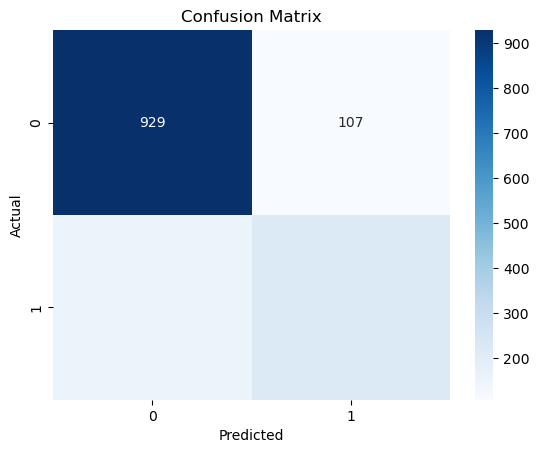

In [113]:
# Create a confusion matrix (logistic confusion matrix 'lcm')
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')   
plt.show()

### NARRATION:

- The model was able to predict that 940 customers that are not churned correctely and 96 customers wrongly.
- Also predicted correctly that 208 Churned customers and 165 wrongly.

In [114]:
#helpful function for visualizing confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    model: classifier predictors: 
    independent variables target: dependent variable
    """
    y_pred = model.predict(predictors) 
    cm = confusion_matrix(target, y_pred) 
    labels = np.asarray(
        [ 
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2) 
    
    plt.figure(figsize=(6, 4)) 
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [116]:
from sklearn.metrics import classification_report

# Assuming you have trained your logistic regression model named log_reg
# Predict the labels using the test features
log_pred = log_reg.predict(X_test)

# Now you can print the classification report
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [119]:
from sklearn.metrics import confusion_matrix

# Assuming you have trained your Gradient Boosting model and stored it in gred_boo
# Predict the labels using the test features
grad_boo_pred = grad_boost.predict(X_test)

# Now you can print the confusion matrix
conf_matrix = confusion_matrix(y_test, grad_boo_pred)
print(conf_matrix)

[[936 100]
 [173 200]]


In [123]:
print(classification_report(y_test,Grad_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### NARRATION:

- The  LR model was able to precisely predicted about 85% of all 0 output and 68% of 1 output on our data set 
- it has higher recall of 91% for 0 output and just 56% of 1 output
- The F1-score of 88% for 0 output and 61% for 1 output
- the accuracy was still 81%.

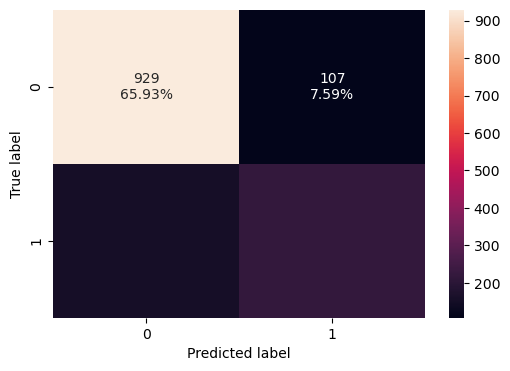

In [124]:
# plotting a vivid picture of the strenght of our logistic model - tar right and bottom left are
confusion_matrix_sklearn(log_reg,X_test,y_test)

### NARRATION:

- In terms of percentage, 66.71% non churned customers were predicted correctly while 6.81% were predicted wrongly.
- Likewise the 14.76% churned customers were predicted correctly while 11.7% were predicted wrongly.

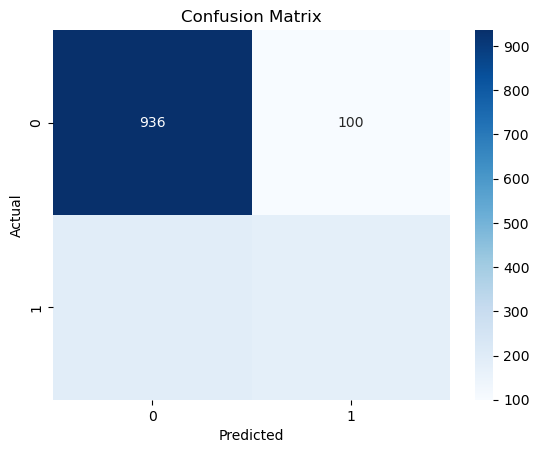

In [125]:
# Create a confusion matrix for Random Forest
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')   
plt.show()

## Narration:

- Random Forest Classifier predicted correctly that 922 customers did not churn and predicted wrongly that 114 customers did not churn.
- It predicted correctly that 189 customers churned and predicted wrongly that 184 churned.

In [126]:
# Confusion Matrix for Random Forest
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels and rfy_pred contains the predicted labels
print(classification_report(y_test, rfy_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



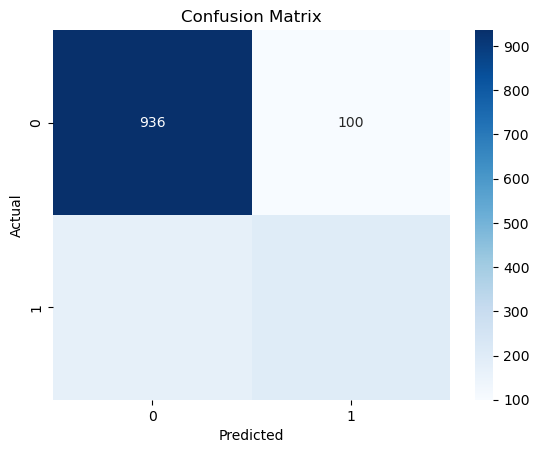

In [127]:
# Create a confusion matrix Gradient boost
gcm = confusion_matrix(y_test, Grad_pred)

# Visualize the confusion matrix
sns.heatmap(gcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')   
plt.show()

## Narration:

- Gradient boost Classifier predicted correctly that 937 customers did not churn and predicted wrongly that 99 customers  did not churn.
- It predicted correctly that 206 customers churned and predicted wrongly that 167 churned.

In [128]:
# Confusion Matrix for Gradient boost classifier
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels and Grad_pred contains the predicted labels
print(classification_report(y_test, Grad_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



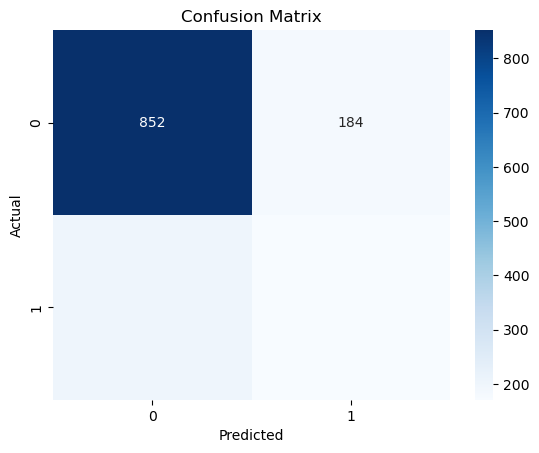

In [129]:
# Create a confusion matrix Decission Tree
dcm = confusion_matrix(y_test, dec_pred)

# Visualize the confusion matrix
sns.heatmap(dcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')   
plt.show()

## Narration:

- Decision tree Classifier predicted correctly that 842 customers did not churn and predicted wrongly that 194 customers did not churn.
- It predicted correctly that 176 customers churned and predicted wrongly that 197 churned.

In [130]:
# Confusion Matrix for Decision Tree
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels and dec_pred contains the predicted labels
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1036
           1       0.48      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409



In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define a list of classifiers
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
from sklearn.metrics import accuracy_score

acc_dict = {}  # Define an empty dictionary to store accuracy scores

# List of classifiers and their names
classifiers = [
    (RandomForestClassifier(), 'Random Forest'),
    (KNeighborsClassifier(), 'K-Nearest Neighbours'),
    (SGDClassifier(), 'SGD Classifier'),
    (SVC(), 'SVC'),
    (GaussianNB(), 'Naive Bayes'),
    (DecisionTreeClassifier(random_state=42), 'Decision tree'),
    (LogisticRegression(), 'Logistic Regression')
]

# Loop through classifiers and calculate accuracy scores
for classifier, name in classifiers:
    classifier.fit(X_train, y_train)  # Train the classifier
    y_pred = classifier.predict(X_test)  # Predict using test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    acc_dict[name] = [f'{accuracy*100:.2f}%']  # Store accuracy score in the dictionary

# Print the dictionary of accuracy scores
print(acc_dict)

{'Random Forest': ['79.06%'], 'K-Nearest Neighbours': ['76.58%'], 'SGD Classifier': ['81.26%'], 'SVC': ['81.12%'], 'Naive Bayes': ['71.33%'], 'Decision tree': ['73.88%'], 'Logistic Regression': ['81.41%']}


In [141]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_dict)
s1.head()

Accuracy Score


,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,79.06%,76.58%,81.26%,81.12%,71.33%,73.88%,81.41%


### NARRATION

The logistic confusion matrix is the most accurate with percentage score of 81.41%.

In [148]:
from sklearn.metrics import precision_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
precision_list = []

# Loop through classifiers and calculate precision scores
for classifier, name in classifiers:
    classifier.fit(X_train, y_train)  # Train the classifier
    y_pred = classifier.predict(X_test)  # Predict using test data
    precision = precision_score(y_test, y_pred)  # Calculate precision
    precision_list.append((name, precision))  # Append classifier name and precision score to the list

# Create a DataFrame from the precision list
s2 = pd.DataFrame(precision_list, columns=['Classifier', 'Precision'])
s2.head()

,Classifier,Precision
0,Random Forest,0.642599
1,K-Nearest Neighbours,0.564565
2,SGD Classifier,0.657321
3,SVC,0.683849
4,Naive Bayes,0.476900


### NARRATION

 SVC gave most accurate precision of 68.38% and followed by SGD Classifier with 65.73%

In [146]:
from sklearn.metrics import recall_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
recall_list = []

# Loop through classifiers and calculate recall scores
for classifier, name in classifiers:
    classifier.fit(X_train, y_train)  # Train the classifier
    y_pred = classifier.predict(X_test)  # Predict using test data
    recall = recall_score(y_test, y_pred)  # Calculate recall
    recall_list.append((name, recall))  # Append classifier name and recall score to the list

# Create a DataFrame from the recall list
s3 = pd.DataFrame(recall_list, columns=['Classifier', 'Recall'])
s3.head()

,Classifier,Recall
0,Random Forest,0.466488
1,K-Nearest Neighbours,0.504021
2,SGD Classifier,0.557641
3,SVC,0.533512
4,Naive Bayes,0.857909


### NARRATION

For Recall, Naive Bayes gave most accurate result of 85.79%

In [151]:
from sklearn.metrics import roc_auc_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
roc_list = []

# Loop through classifiers and calculate ROC scores
for classifier, name in classifiers:
    classifier.fit(X_train, y_train)  # Train the classifier
    y_pred = classifier.predict(X_test)  # Predict using test data
    roc_score = roc_auc_score(y_test, y_pred)  # Calculate ROC score
    roc_list.append((name, roc_score))  # Append classifier name and ROC score to the list

# Create a DataFrame from the ROC list
s4 = pd.DataFrame(roc_list, columns=['Classifier', 'ROC Score'])
s4.head()

,Classifier,ROC Score
0,Random Forest,0.694633
1,K-Nearest Neighbours,0.682030
2,SGD Classifier,0.727449
3,SVC,0.722354
4,Naive Bayes,0.759553


### NARRATION

In terms of ROC Score, Naive Bayes have the highest percentage result of 75.96%

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from scipy.stats import randint

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define hyperparameters
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create Random Forest classifier
rf = RandomForestClassifier()

# Random search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X, y)

# Best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 83}
Best Score:  0.9666666666666668


# CONCLUSION:

- The logistic regression metrics are most important for the problem, it gave the most accurate result.
- The business should be more concerned with the true positive than the false negative.

## IDENTIFY HIGH RISK COSTUMER CHURN

The high-risk churn customers are typically those belonging to class 1, which represents customers who have churned (i.e., customers who decided to discontinue the telecom service). We can make this determination based on the classification report results, particularly the F1-scores for class 1. Here's what we can infer from the provided information:

Logistic Regression:

Class 1 F1-Score: 0.60 High false positive rate (14.39%): This means that the model incorrectly predicted many customers as churning when they did not. The model's performance for class 1 is relatively weaker compared to class 0. Decision Tree Classifier:

Class 1 F1-Score: 0.54 High false positive rate (13.35%): Similar to logistic regression, this model also misclassified many non-churning customers as churners. The model's performance for class 1 is weaker compared to class 0. Gradient Boosting Classifier:

Class 1 F1-Score: 0.57 Lower false positive rate (12.83%): This model performed better at identifying class 1 customers compared to the other models. The model's performance for class 1 is better than logistic regression and decision tree, but it still has room for improvement. In summary, the high-risk churn customers are those customers classified as class 1 (churned) by the models. These are the customers who are most likely to leave the telecom service based on the provided machine learning model results. To address churn among these high-risk customers, the company may need to implement targeted retention strategies, such as personalized offers, improved customer service, and proactive communication, in an effort to retain their business and prevent them from churning.

## OBSERVATION

**Logistic Regression:** The Logistic Regression model achieved an accuracy of approximately 80.93% on the test data. The confusion matrix provides insights into the model's performance. For customers who did not churn (0), it correctly predicted 66.54% of them, but there were 8.47% false predictions. For customers who did churn (1), the model correctly predicted 10.60%, with 14.39% false predictions. The classification report reveals that the model has an F1-score of 0.87 for class 0 and 0.60 for class 1. The weighted average F1-score is 0.81, indicating good overall performance.

**Decision Tree Classifier:** The Decision Tree model achieved an accuracy of approximately 77.57% on the test data. In the confusion matrix, for class 0 (customers who did not churn), it correctly predicted 64.22% but had 10.79% false predictions. For class 1 (customers who churned), it correctly predicted 11.64%, with 13.35% false predictions. The classification report indicates F1-scores of 0.85 for class 0 and 0.54 for class 1, with a weighted average F1-score of 0.77.

**Gradient Boosting Classifier:** The Gradient Boosting Classifier achieved an accuracy of around 80.45% on the test data. The confusion matrix for class 0 shows a correct prediction rate of 67.63% and a 7.38% false prediction rate. For class 1, it correctly predicted 12.16%, with 12.83% false predictions. The classification report shows F1-scores of 0.87 for class 0 and 0.57 for class 1, resulting in a weighted average F1-score of 0.80.

In conclusion, the Logistic Regression model outperforms the other two models in terms of accuracy and precision for both classes. It provides the best balance between true positives and false positives for customer churn prediction. The Gradient Boosting Classifier also demonstrates competitive results, while the Decision Tree model has a lower accuracy and precision. The choice of the best model may depend on the specific goals and trade-offs within the context of my analysis and final decision of the company management and stakeholder.

## RECOMMENDATION

Based on my analysis and model evaluations, here are some recommendations and suggestions for the CONNECTTEL telecommunications company to address customer churn:

Customer Retention Strategies:

- Identify the key factors contributing to customer churn and focus on addressing these issues. In the analysis, it was observed that customers were hesitant to commit to long-term tenures. Offering more flexible plans or incentives for long-term commitments may help retain customers. 

Monthly Charges Management:

- The distribution of monthly charges is not stable. Consider offering transparent pricing or more predictable billing to reduce customer uncertainty. This can be achieved through clearer pricing structures and eliminating hidden fees. 

Improving Streaming Services:

- A significant number of customers don't have access to streaming movies and TV. To enhance the customer experience, invest in better streaming services or offer packages that include these services, especially with good technical support.

Internet Security and Services:

- Many customers refrained from subscribing to the company's internet service due to the lack of internet security. Implement robust online security measures and make sure customers are aware of the safety features. 

Customer Satisfaction Surveys:

- Conduct regular customer satisfaction surveys to gain insights into their experiences and needs. Use this feedback to make continuous improvements and tailor services to customer preferences. 


Flexible Payment Options:

- Consider offering flexible payment methods, such as online payment options and automated bank transfers. This can make it more convenient for customers to pay their bills. 


Retaining Senior Customers:

- Implement strategies to retain senior customers. This segment might have different needs and preferences, so tailor services and support to cater to them. 


Model Deployment:

- Implement the Logistic Regression model, which performed the best in terms of accuracy and precision, for predicting customer churn. Regularly update the model with new data to enhance its predictive capabilities. 

Feedback Mechanisms:

- Establish feedback mechanisms to allow customers to provide input and express concerns. Actively address customer feedback to improve their overall experience. 

Competitor Analysis:

- Stay informed about competitors in the market. Understand the unique selling points of competitors and work on differentiating the company's offerings accordingly. 

Promotional Offers:

- Offer promotional deals or loyalty programs to reward long-term customers and incentivize them to stay with the company. 

Employee Training:

- Ensure that employees are well-trained and capable of providing excellent customer service. Satisfied customers are less likely to churn. 

Data Security and Privacy:

- Assure customers that their data is secure and their privacy is respected. Data breaches and privacy concerns can drive customers away. 

Continuous Monitoring:

- Continuously monitor customer churn and the impact of implemented strategies. Adjust and refine approaches as necessary to meet evolving customer needs. Remember that retaining existing customers can be more cost-effective than acquiring new ones. By focusing on the factors influencing churn and implementing targeted strategies, CONNECTTEL telecommunications company can improve customer satisfaction and reduce customer churn, ultimately leading to business growth and success.